## Feature Selection
How to select the feature ?

* If a Feature is having All Unique values over all rows then drop it.
* If a Feature has Null Values more than 40% of population then drop the feature.
* If all the five point summary describes same values on all the quartiles (i.e standard deviation is zero) then drop the feature.
* 
* you can select the feature based upon the below items
> - P-value
> - R^2
> - b value
> Note: These are called Wrapper methods
* Embeded Method


Below are technique of feature selection
1. **Backward Elimination** 
2. **Forward Selection**
3. **Recursive Feature Elimination**

In [1]:
import pyforest

## Problem Statement

The dataset contains the temperature, humidity, pressure, and so on recorded from different rooms. The data is collected from the sensors that are implanted in different houses. The house temperature and humidity were monitored using a wireless sensor network. We aim is predict the energy used by the appliances in Wh.

## About the dataset (Appliances Energy Prediction data)

**Appliances**: Energy use in Wh (Target Variable)<br>
**lights**: Energy use of light fixtures in the house in Wh<br>
**T1**: Temperature in the kitchen area in Celsius<br>
**RH_1**: Humidity in the kitchen area in %<br>
**T2**: Temperature in the living room area in Celsius<br>
**RH_2**: Humidity in the living room area in %<br>
**T3**: Temperature in the laundry room area<br>
**RH_3**: Humidity in the laundry room area in %<br>
**T4**: Temperature in the office room in Celsius<br>
**RH_4**: Humidity in the office room in %<br>
**T5**: Temperature in the bathroom in Celsius<br>
**RH_5**: Humidity in the bathroom in %<br>
**T6**: Temperature outside the building (north side) in Celsius<br>
**RH_6**: Humidity outside the building (north side) in %<br>
**T7**: Temperature in ironing room  in Celsius<br>
**RH_7**: Humidity in ironing room in %<br>
**T8**: Temperature in teenager room 2 in Celsius<br>
**RH_8**: Humidity in teenager room 2 in %<br>
**T9**: Temperature in parents room in Celsius<br>
**RH_9**: Humidity in parents room in %<br>
**T_out**: Temperature outside the building in Celsius<br>
**Pres_mm_hg**:  Pressure in mm Hg<br>
**RH_out**: Humidity outside the building in %<br>
**Windspeed**:  Speed of the wind in m/s<br>
**Visibility**:  Visibility of the building from the nearest weather station in km

In [2]:
energy = pd.read_csv("../data-sets/energy_data.csv")

energy.head()

<IPython.core.display.Javascript object>

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.700000,44.700000,19.500000,45.590000,21.390000,41.95,20.566667,45.626667,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.70,20.463333,37.526667,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.29,21.323333,34.730000,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.79,15.890000,47.530000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,30,21.700000,46.633333,20.700000,45.900000,22.323333,44.79,21.000000,47.966667,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


In [3]:
energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,94.580000,3.880000,21.689083,40.220658,20.308276,40.456847,22.291003,39.193848,20.877548,38.883203,...,35.202685,22.110523,42.876733,19.500280,41.421305,7.270235,755.522126,79.722845,4.057964,38.219167
std,95.963705,8.075321,1.533835,3.966141,2.123854,4.080899,1.939537,3.171917,1.947205,4.297529,...,5.069127,1.877895,5.208331,1.926965,4.132533,5.207305,7.433976,14.623087,2.454295,11.679127
min,20.000000,0.000000,16.823333,28.193333,16.200000,24.823333,17.290000,33.200000,15.160000,29.421429,...,23.290000,16.583333,29.600000,15.000000,29.426667,-4.955556,730.700000,24.500000,0.000000,3.333333
25%,50.000000,0.000000,20.790000,37.200000,18.790000,38.057500,20.823333,36.900000,19.566667,35.484167,...,31.352738,20.910625,39.200000,18.100000,38.421429,3.537500,750.800000,70.000000,2.000000,28.666667
50%,60.000000,0.000000,21.600000,39.700000,19.890000,40.400000,22.100000,38.500000,20.760000,38.290000,...,34.609111,22.200000,42.352333,19.500000,40.566667,6.841667,755.941667,83.833333,3.666667,40.000000
75%,100.000000,0.000000,22.533333,42.861667,21.390000,43.200000,23.390000,41.500000,22.100000,41.992500,...,39.000000,23.441857,46.430694,20.600000,44.308333,10.433333,760.937500,91.333333,5.666667,40.000000
max,800.000000,40.000000,26.066667,54.800000,29.100000,53.249880,28.867143,49.930000,26.100000,50.963333,...,49.444444,27.100000,56.598333,24.434000,52.700000,25.600000,772.200000,100.000000,13.000000,65.000000


#### Here lights column is having 0 in all the five point summary so drop the feature

In [4]:
energy = energy.drop('lights', axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

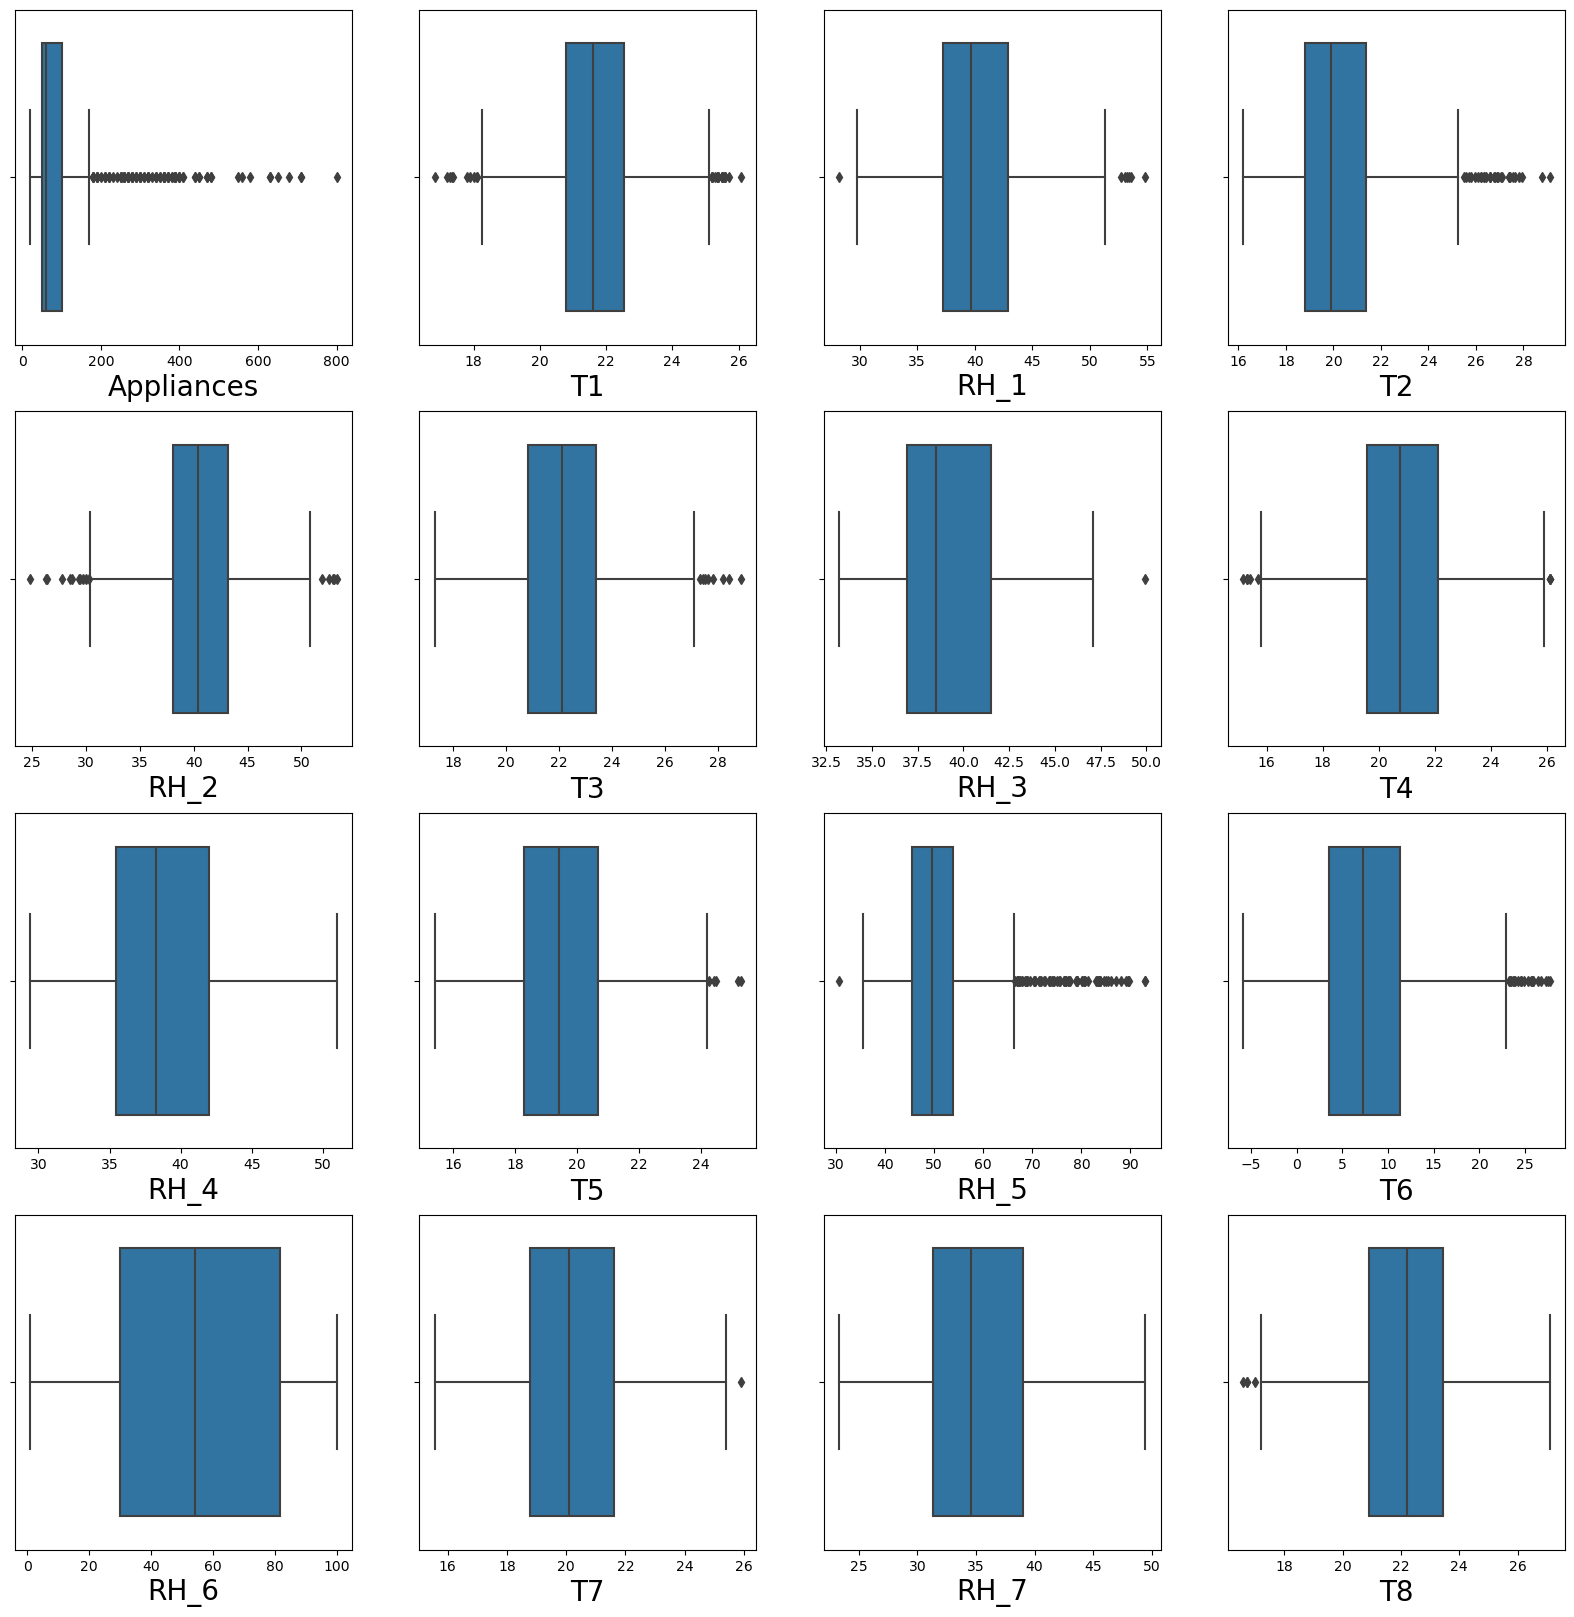

In [5]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for variable, subplot in zip(energy.columns, ax.flatten()):
    z = sns.boxplot(x = energy[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                   # set the x-axis label

### To treat the Outliers we are going with Caping method to treat the outliers in the Sample

In [6]:
for i in energy.columns:
    q1 = energy[i].quantile(0.25)
    q3 = energy[i].quantile(0.75)

    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr

    energy[i] = np.where(energy[i] < lb, energy[i].quantile(0.01), energy[i])
    energy[i] = np.where(energy[i] > ub, energy[i].quantile(0.9), energy[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

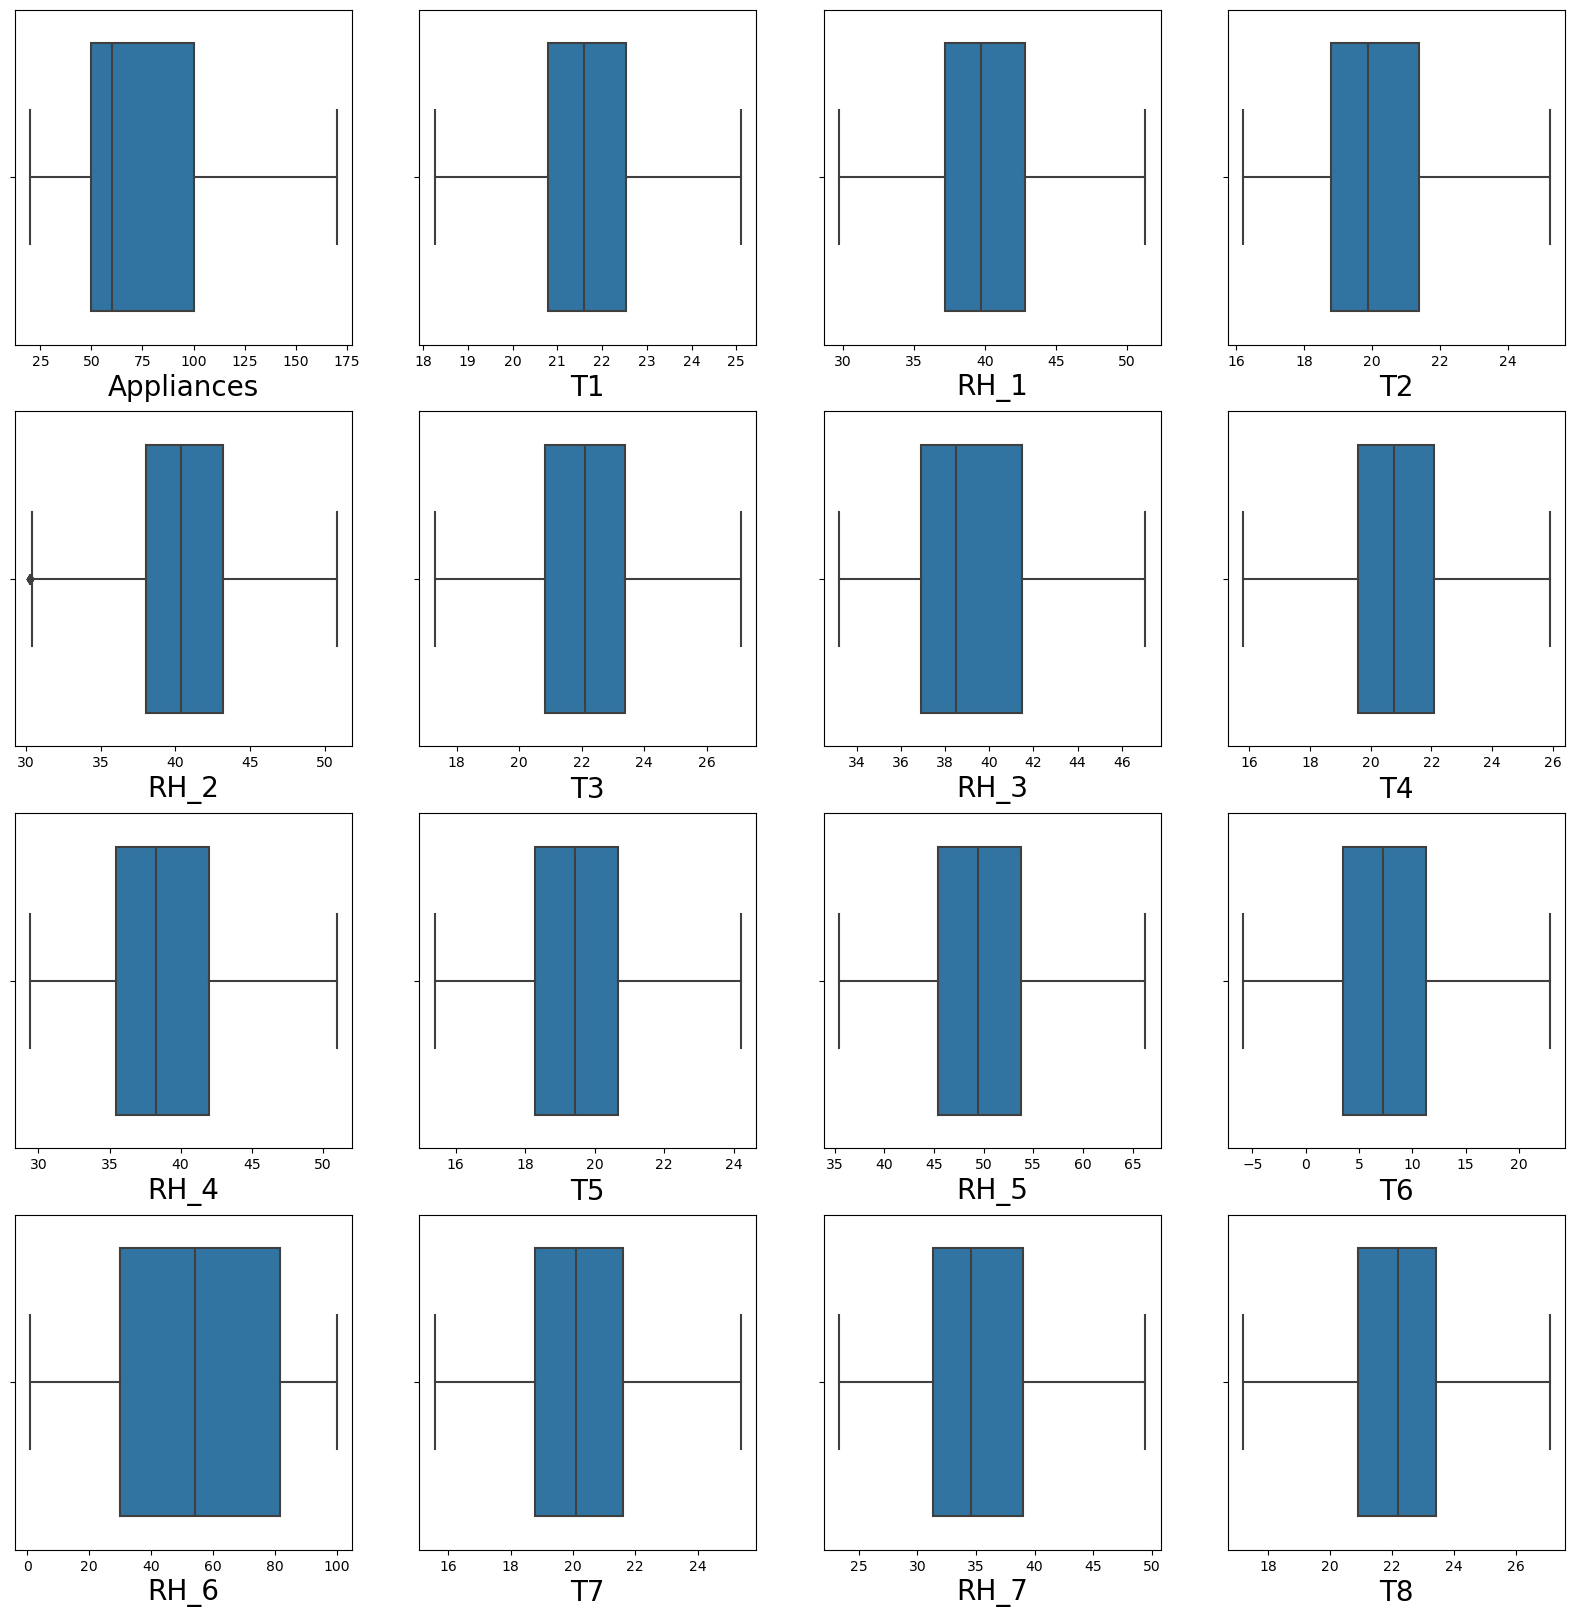

In [7]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for variable, subplot in zip(energy.columns, ax.flatten()):
    z = sns.boxplot(x = energy[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)

In [8]:
energy.isnull().sum().sum() # 0 denotes that there is no Missing Values

0

In [9]:
energy.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,76.49000,21.662343,40.177857,20.200596,40.441785,22.267316,39.188093,20.874301,38.883203,19.592496,...,35.202685,22.113608,42.876733,19.496681,41.429011,7.134435,755.553372,79.793145,4.028464,37.854195
std,38.40905,1.451204,3.841120,1.862205,3.937239,1.887691,3.157607,1.920966,4.297529,1.747256,...,5.069127,1.869671,5.208331,1.919469,4.113791,4.896667,7.343905,14.402851,2.379624,10.637561
min,20.00000,18.258400,29.726667,16.200000,30.287400,17.290000,33.200000,15.800000,29.421429,15.390000,...,23.290000,17.200000,29.600000,15.000000,30.500000,-4.955556,736.050000,38.980000,0.000000,15.000000
25%,50.00000,20.790000,37.200000,18.790000,38.057500,20.823333,36.900000,19.566667,35.484167,18.290000,...,31.352738,20.910625,39.200000,18.100000,38.421429,3.537500,750.800000,70.000000,2.000000,28.666667
50%,60.00000,21.600000,39.700000,19.890000,40.400000,22.100000,38.500000,20.760000,38.290000,19.417500,...,34.609111,22.200000,42.352333,19.500000,40.566667,6.841667,755.941667,83.833333,3.666667,40.000000
75%,100.00000,22.533333,42.861667,21.390000,43.200000,23.390000,41.500000,22.100000,41.992500,20.666667,...,39.000000,23.441857,46.430694,20.600000,44.308333,10.433333,760.937500,91.333333,5.666667,40.000000
max,170.00000,25.100000,51.293636,25.230000,50.790000,27.096364,47.056364,25.890000,50.963333,24.200000,...,49.444444,27.100000,56.598333,24.200000,52.700000,20.766667,772.200000,100.000000,11.000000,58.033333


## Split the Features to Dependant variable and the Target Feature

In [10]:
X = energy.drop('Appliances', axis=1) # Dependant Features from which the Predictions of Target will be made
Y = energy.Appliances # Target Feature

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc, columns=X.columns)

X_sc.head()

<IPython.core.display.Javascript object>

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,-0.663466,1.177887,-0.376407,1.308224,-0.464989,0.875121,-0.160226,1.569934,-0.877526,0.467548,...,1.596204,-0.863476,1.904300,-0.620281,1.498392,0.793228,0.133506,0.593248,2.020182,0.029389
1,-0.256704,-0.602866,-0.435506,-0.197814,-0.252984,-0.788362,-0.214045,-0.315813,-0.115952,-1.082950,...,-0.613368,-0.060794,-0.701804,0.053854,-0.632907,0.248368,0.851012,-0.680285,-0.222190,0.201821
2,-0.187761,-1.142910,-0.489233,-0.696721,0.261129,-1.551980,0.233871,-0.966900,-0.667568,-0.982780,...,-1.184758,0.147903,-1.073190,-0.017382,-1.441974,-0.054711,0.923671,-0.703440,-0.432412,-0.205745
3,-1.812513,0.429467,-0.895764,0.215542,-2.208731,1.458132,-2.595983,2.013046,-2.406401,0.168638,...,0.974265,-1.348058,1.572508,-2.291718,1.296531,-0.408870,1.911378,0.847955,0.338403,-1.381414
4,0.025962,1.681464,0.268313,1.386999,0.029690,1.774986,0.065468,2.114706,0.004297,1.049473,...,1.973183,-0.879827,1.981032,-0.628968,2.537694,0.306259,0.274282,1.102661,0.828922,1.643975


In [12]:
Y.skew()

1.0092023763616773

<IPython.core.display.Javascript object>

C:\Users\lokesh\AppData\Local\Temp\ipykernel_41540\1412474975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y, kde=True)
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Appliances', ylabel='Density'>

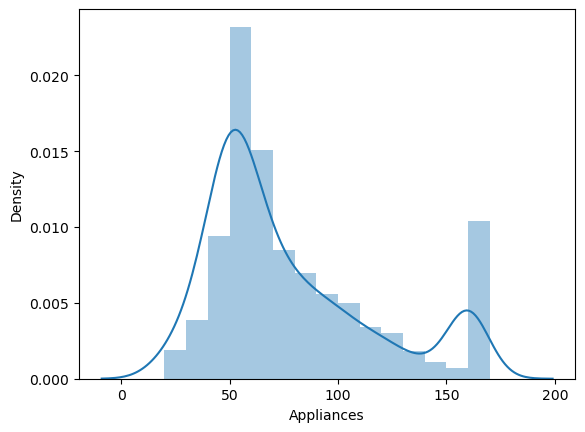

In [13]:
sns.distplot(Y, kde=True)

Box Cox transformation

In [14]:
from scipy.stats import boxcox

In [15]:
box_Y, lam = boxcox(Y) 

In [16]:
box_Y = pd.DataFrame(box_Y)

box_Y.skew()

<IPython.core.display.Javascript object>

0    0.004218
dtype: float64

In [17]:
lam # Value of lamda

-0.0970028670887093

<IPython.core.display.Javascript object>

C:\Users\lokesh\AppData\Local\Temp\ipykernel_41540\146284075.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(box_Y, kde=True)
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

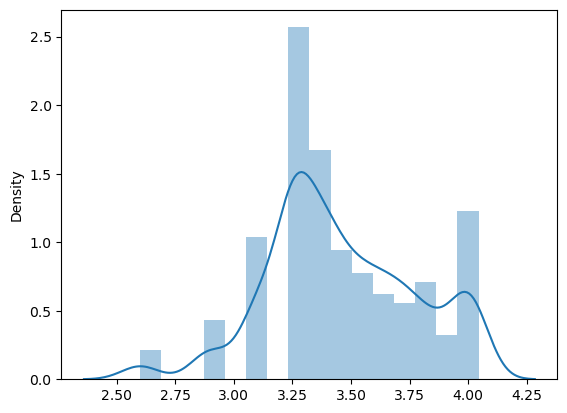

In [18]:
sns.distplot(box_Y, kde=True)

In [19]:
# Inveese BoxCox values
from scipy.special import inv_boxcox

Y_1 = inv_boxcox(box_Y, lam)

Y_1.skew()

0    1.009202
dtype: float64

<IPython.core.display.Javascript object>

C:\Users\lokesh\AppData\Local\Temp\ipykernel_41540\587476138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_1, kde=True)
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

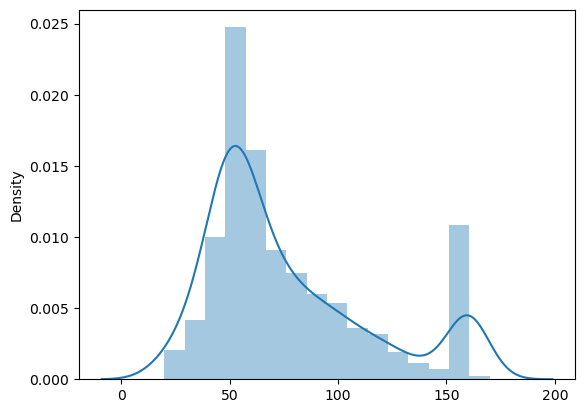

In [20]:
sns.distplot(Y_1, kde=True)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(X_sc.values, i) for i in range(X_sc.shape[1])]
vif['feature'] = X_sc.columns

vif.sort_values('vif', ascending = False)

<IPython.core.display.Javascript object>

,vif,feature
16,23.588606,T9
10,20.561874,T6
18,20.140849,T_out
7,16.907077,RH_4
12,15.267661,T7
2,13.955872,T2
0,13.404370,T1
1,11.995605,RH_1
3,10.731543,RH_2
13,10.309529,RH_7


#### **Note:** Don't drop multiple Features at a time, always drop every feature in sequential one after the one

In [22]:
X_sc1 = X_sc.drop(columns=['T9', 'T6', 'RH_4']) # here its done in session 3 and concluded that droping these columns will give the Normality of VIF
# by repeating this below process for multiple times post droping of the above three feature the Input Sample is Normalized
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(X_sc1.values, i) for i in range(X_sc1.shape[1])]
vif['feature'] = X_sc1.columns

vif.sort_values('vif', ascending = False)

<IPython.core.display.Javascript object>

,vif,feature
0,12.462406,T1
1,11.518129,RH_1
2,11.507273,T2
10,10.715029,T7
3,10.133529,RH_2
11,8.909752,RH_7
13,8.758071,RH_8
5,8.753880,RH_3
4,8.572502,T3
9,8.546468,RH_6


In [23]:
import statsmodels.api as sm

Xc = sm.add_constant(X_sc1)
ols = sm.OLS(box_Y, Xc)
ols_mod = ols.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     20.96
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.75e-62
Time:                        14:24:51   Log-Likelihood:                -96.538
No. Observations:                1000   AIC:                             235.1
Df Residuals:                     979   BIC:                             338.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4560      0.009    405.770      0.000       3.439       3.473
T1             -0.0696      0.030     -2.313      0.021      -0.129      -0.011
RH_1            0.1272      0.029      4.401      0.000       0.070       0.184
T2              0.0228      0.029      0.790      0.430      -0.034       0.080
RH_2           -0.0589      0.027     -2.174      0.030      -0.112      -0.006
T3              0.0988      0.025      3.961      0.000       0.050       0.148
RH_3            0.0731      0.025      2.901      0.004       0.024       0.123
T4              0.0398      0.022      1.787      0.074      -0.004       0.083
T5             -0.0183      0.023     -0.798      0.425      -0.063       0.027
RH_5            0.0197      0.011      1.798      0.072      -0.002       0.041
RH_6            0.0316      0.025      1.271      0.204      -0.017       0.081
T7             -0.1719      0.028     -6.165      0.000      -0.227      -0.117
RH_7            0.0192      0.025      0.755      0.450      -0.031       0.069
T8              0.1840      0.023      7.872      0.000       0.138       0.230
RH_8           -0.2088      0.025     -8.285      0.000      -0.258      -0.159
RH_9           -0.0292      0.021     -1.408      0.160      -0.070       0.011
T_out           0.0096      0.021      0.447      0.655      -0.033       0.052
Press_mm_hg    -0.0015      0.010     -0.144      0.886      -0.021       0.018
RH_out         -0.0157      0.020     -0.804      0.421      -0.054       0.023
Windspeed       0.0287      0.011      2.685      0.007       0.008       0.050
Visibility     -0.0088      0.009     -1.008      0.314      -0.026       0.008
==============================================================================
Omnibus:                        9.007   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               12.487
Skew:                           0.060   Prob(JB):                      0.00194
Kurtosis:                       3.534   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
ols_mod.resid.skew()

0.060393254424483685

In [25]:
Y_pred = ols_mod.predict()

<IPython.core.display.Javascript object>

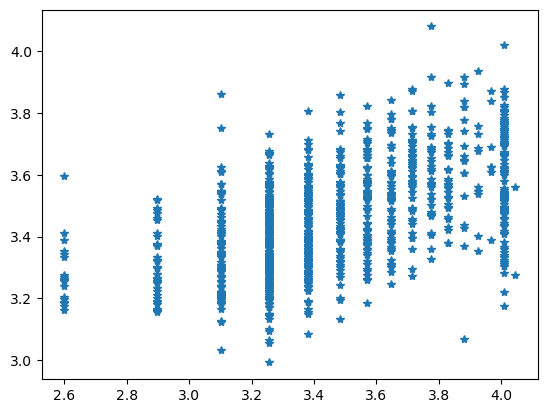

In [26]:
plt.plot(box_Y, Y_pred, '*')

In [27]:
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(ols_mod)

(0.8342197354930532, 0.9774772350901021)

<IPython.core.display.Javascript object>

<Axes: >

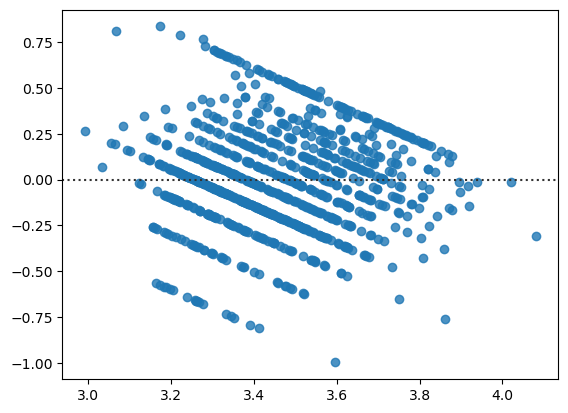

In [28]:
sns.residplot(x=Y_pred, y=ols_mod.resid)

This Resid plot shows the Features are in equal Variance, though we see there is pattern formed on the plot, but the distribution of the Predictions are equally distributed

In [29]:
p_val = ols_mod.pvalues

In [30]:
p_val[p_val > 0.05]

T2             0.429947
T4             0.074208
T5             0.424881
RH_5           0.072448
RH_6           0.204062
RH_7           0.450223
RH_9           0.159553
T_out          0.654742
Press_mm_hg    0.885705
RH_out         0.421445
Visibility     0.313801
dtype: float64

These are The Features which are insignificant in the Sample

In [31]:
p_val[p_val > 0.05].max()

0.8857047504116135

In [32]:
X_v1 = X_sc1.copy()

In [33]:
while (len(X_v1.columns) > 0):
    X_sc = sm.add_constant(X_v1)
    ols = sm.OLS(box_Y, X_sc)
    ols_mod = ols.fit()

    f = ols_mod.pvalues[1:].idxmax()
    if ols_mod.pvalues[1:].max() > 0.05:
        X_v1 = X_v1.drop(columns=f)
    else:
        break

print(" The Final Features are: ", X_v1.columns)

 The Final Features are:  Index(['T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'T7', 'T8', 'RH_8',
       'Windspeed'],
      dtype='object')


In [34]:
X_v1

,T1,RH_1,RH_2,T3,RH_3,T4,T7,T8,RH_8,Windspeed
0,-0.663466,1.177887,1.308224,-0.464989,0.875121,-0.160226,-1.085462,-0.863476,1.904300,2.020182
1,-0.256704,-0.602866,-0.197814,-0.252984,-0.788362,-0.214045,-0.508105,-0.060794,-0.701804,-0.222190
2,-0.187761,-1.142910,-0.696721,0.261129,-1.551980,0.233871,-0.541485,0.147903,-1.073190,-0.432412
3,-1.812513,0.429467,0.215542,-2.208731,1.458132,-2.595983,-2.341005,-1.348058,1.572508,0.338403
4,0.025962,1.681464,1.386999,0.029690,1.774986,0.065468,-0.759076,-0.879827,1.981032,0.828922
...,...,...,...,...,...,...,...,...,...,...
995,-0.601417,0.107351,-0.010618,-1.095704,0.285773,-0.351197,-0.145866,-0.595915,0.868902,-0.642635
996,0.232790,-1.296587,-0.833095,-0.464989,-1.485441,-0.252239,-0.376644,0.361952,-0.637132,-1.273302
997,0.088010,0.568385,1.528455,-0.035679,-0.189508,0.169635,-0.145866,-0.173169,-0.156891,-0.011968
998,-0.277386,-1.273145,-1.636936,-1.048003,-0.991149,0.065468,0.772302,0.989827,-1.732080,0.828922


In [35]:
X_sc = sm.add_constant(X_v1)
ols = sm.OLS(box_Y, X_sc)
ols_mod = ols.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     40.87
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           9.77e-68
Time:                        14:24:52   Log-Likelihood:                -101.76
No. Observations:                1000   AIC:                             225.5
Df Residuals:                     989   BIC:                             279.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4560      0.009    405.715      0.000       3.439       3.473
T1            -0.0522      0.023     -2.287      0.022      -0.097      -0.007
RH_1           0.1451      0.023      6.309      0.000       0.100       0.190
RH_2          -0.0794      0.017     -4.789      0.000      -0.112      -0.047
T3             0.0769      0.022      3.552      0.000       0.034       0.119
RH_3           0.0867      0.022      3.941      0.000       0.044       0.130
T4             0.0431      0.021      2.064      0.039       0.002       0.084
T7            -0.1824      0.024     -7.728      0.000      -0.229      -0.136
T8             0.1843      0.021      8.813      0.000       0.143       0.225
RH_8          -0.2089      0.016    -12.900      0.000      -0.241      -0.177
Windspeed      0.0335      0.009      3.585      0.000       0.015       0.052
==============================================================================
Omnibus:                        6.613   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                8.476
Skew:                           0.050   Prob(JB):                       0.0144
Kurtosis:                       3.440   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Forward Selection Technique

In [36]:
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split

In [37]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sc1, box_Y, test_size=0.3, random_state=48)

In [38]:
lr = LinearRegression()

lr.fit(X_Train, Y_Train)

LinearRegression()

In [39]:
Y_pred = lr.predict(X_Test)

In [40]:
lr.coef_

pd.DataFrame(lr.coef_, columns=X_Train.columns)

<IPython.core.display.Javascript object>

,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,-0.07967,0.125978,0.021541,-0.073566,0.117768,0.078293,0.05807,-0.025304,0.005911,0.04927,-0.200405,0.036628,0.200984,-0.232611,-0.009236,0.01162,0.014028,-0.019783,0.027041,-0.00317


In [41]:
lr.intercept_

array([3.46518161])

In [42]:
Y_pred.shape

(300, 1)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(Y_Test, Y_pred)

0.24100506280332257

In [44]:
mean_squared_error(Y_Test, Y_pred)

0.0806727023588955

### Feature Selection with SK-Learn

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [46]:
lr = LinearRegression()

lr_back = sfs(estimator=lr, k_features=8, forward=False) # here k_features is the no of features to be selected
# k_features accpets tuple value (4, 16) this gives best set of significant features within the range of 4 to 16.
# can be given **best** to get the best features out the significance features
# to make the above as forward selection / backward selection we can toggle with forward as True or False, True will give the Forward Selection and False will Backward Selection
sfs_back = lr_back.fit(X_Train, Y_Train)
back_feat = sfs_back.k_feature_names_

sfs_back.k_score_ # this it the value of R-Square value

0.2622032475641302

* here k_features is the no of features to be selected
* k_features accpets tuple value (4, 16) this gives best set of significant features within the range of 4 to 16. can be given **best** to get the best features out the significance features
* to make the above as forward selection / backward selection we can toggle with forward as True or False, True will give the Forward Selection and False will Backward Selection

### Feature ranking with recursive feature elimination.

In [47]:
from sklearn.feature_selection import RFE

rfe_mod = RFE(estimator=lr, n_features_to_select=8)
rfe_feat = rfe_mod.fit(X_Train, Y_Train)

rfe_feat.ranking_

array([ 1,  1,  6,  1,  1,  1,  2,  4, 12,  7,  1,  3,  1,  1, 10, 11,  9,
        8,  5, 13])

In [48]:
rank = pd.DataFrame()

rank['Rank'] = rfe_feat.ranking_
rank['Feature'] = X_Train.columns

feat = rank[rank['Rank'] == 1]
feat = feat.reindex()
feat

<IPython.core.display.Javascript object>

,Rank,Feature
0,1,T1
1,1,RH_1
3,1,RH_2
4,1,T3
5,1,RH_3
10,1,T7
12,1,T8
13,1,RH_8


### Recursive feature elimination with cross-validation to select features.

In [49]:
from sklearn.feature_selection import RFECV

rfe_mod = RFECV(estimator=lr)
rfe_feat = rfe_mod.fit(X_Train, Y_Train)

rfe_feat.ranking_
rank = pd.DataFrame()

rank['Rank'] = rfe_feat.ranking_
rank['Feature'] = X_Train.columns

feat = rank[rank['Rank'] == 1]
feat = feat.reindex()
feat

<IPython.core.display.Javascript object>

,Rank,Feature
1,1,RH_1
3,1,RH_2
4,1,T3
5,1,RH_3
10,1,T7
12,1,T8
13,1,RH_8


In [50]:
print("BackWord Feature Slection Method selected Features")
list(back_feat)

BackWord Feature Slection Method selected Features


['RH_1', 'RH_2', 'T3', 'RH_3', 'T7', 'T8', 'RH_8', 'Windspeed']

In [51]:
print("Features Selected By Recursive Forward Elimator")
list(feat.Feature)

Features Selected By Recursive Forward Elimator


['RH_1', 'RH_2', 'T3', 'RH_3', 'T7', 'T8', 'RH_8']

In [52]:
X_Train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,RH_5,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
729,0.156953,0.419916,-0.322680,1.209120,0.989013,0.225570,0.430051,0.685706,0.083920,-0.096241,0.477235,0.261316,0.474327,0.792064,0.868488,0.432258,-1.437744,0.604825,0.408477,-0.973849
319,-0.946131,-0.612417,-0.913673,-0.419739,-0.729995,0.003773,-0.872029,-0.974870,-0.221384,0.899271,-0.958534,-0.422905,-0.809964,0.611493,0.187510,-0.711949,-1.705673,0.570093,0.478551,-0.660337
340,-1.421837,-0.306798,-1.074853,-0.315553,-1.313010,0.415683,-0.976196,-1.349931,1.853405,1.022237,-1.256073,-0.261937,-1.291573,0.504880,-0.242155,-2.377179,0.128964,0.778489,-1.273302,1.897920
361,-0.111924,-1.273145,-0.990682,-0.410421,0.176327,-1.422070,0.117551,0.399399,-1.205498,-0.080835,0.739334,-0.377509,1.330521,-0.816421,-1.191471,-1.055892,0.344671,0.743756,-1.203228,0.201821
62,-0.877189,-0.882439,-1.343487,-0.165627,-1.148706,-0.629935,0.268593,-0.854622,0.732891,-0.073293,-1.036010,-0.081452,-0.922339,0.221538,-0.906919,-0.998001,-0.518154,0.083835,-1.273302,-1.444117


In [53]:
lr = LinearRegression()
X_Train_feat = X_Train[list(back_feat)]
X_test_feat = X_Test[list(back_feat)]
lr.fit(X_Train_feat, Y_Train)

ypred_train = lr.predict(X_Train_feat)
ypred_test = lr.predict(X_test_feat)

r2_train = r2_score(Y_Train, ypred_train)
r2_test = r2_score(Y_Test, ypred_test)

mse_train = mean_squared_error(Y_Train, ypred_train)
mse_test = mean_squared_error(Y_Test, ypred_test)

res_backw = [r2_train, r2_test, mse_train, mse_test]
res_backw

[0.29657567933792517,
 0.25244382265523524,
 0.0694839624274333,
 0.07945688967864686]

In [54]:
lr = LinearRegression()
X_Train_feat = X_Train[list(feat.Feature)]
X_test_feat = X_Test[list(feat.Feature)]
lr.fit(X_Train_feat, Y_Train)

ypred_train = lr.predict(X_Train_feat)
ypred_test = lr.predict(X_test_feat)

r2_train = r2_score(Y_Train, ypred_train)
r2_test = r2_score(Y_Test, ypred_test)

mse_train = mean_squared_error(Y_Train, ypred_train)
mse_test = mean_squared_error(Y_Test, ypred_test)

res_rfe = [r2_train, r2_test, mse_train, mse_test]
res_rfe

[0.29007090311684036,
 0.2411523857772646,
 0.07012650152264018,
 0.08065704356877056]

In [58]:
lr = LinearRegression()

lr_forw = sfs(estimator=lr, k_features='best', forward=True)
sfs_forw = lr_forw.fit(X_Train, Y_Train)
forw_feat = sfs_forw.k_feature_names_

sfs_forw.k_score_ # this it the value of R-Square value

0.2580618649247601

In [62]:
lr = LinearRegression()
X_Train_feat = X_Train[list(forw_feat)]
X_test_feat = X_Test[list(forw_feat)]
lr.fit(X_Train_feat, Y_Train)

ypred_train = lr.predict(X_Train_feat)
ypred_test = lr.predict(X_test_feat)

r2_train = r2_score(Y_Train, ypred_train)
r2_test = r2_score(Y_Test, ypred_test)

mse_train = mean_squared_error(Y_Train, ypred_train)
mse_test = mean_squared_error(Y_Test, ypred_test)

res_fw = [r2_train, r2_test, mse_train, mse_test]
res_fw

[0.3084303180891814,
 0.24613114075160314,
 0.06831296613204249,
 0.08012785740628288]

In [65]:
resultant = pd.DataFrame(index=['R2_Train', 'R2_Test', 'mse_Train', 'MSE_Test'])

resultant['BackW'] = res_backw
resultant['Forw'] = res_fw
resultant['RFE'] = res_rfe

<IPython.core.display.Javascript object>

In [66]:
resultant

,BackW,Forw,RFE
R2_Train,0.296576,0.308430,0.290071
R2_Test,0.252444,0.246131,0.241152
mse_Train,0.069484,0.068313,0.070127
MSE_Test,0.079457,0.080128,0.080657


* Biased Error: Error produced by the model during the Fitting Stage (Training Stage)
* Variance Error: Difference in prediction when model fits into diffrent data set